In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load CSV with semicolon separator
df = pd.read_csv("/Users/saahi/Desktop/AirQualityProject/air_quality.csv", sep=';')

# Drop extra unnamed columns
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])

In [17]:
# Columns we want as numeric
numeric_cols = ["CO(GT)", "NOx(GT)", "NO2(GT)", "PT08.S5(O3)", "T", "RH", "AH"]

# Replace commas with dots and convert to float
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Drop rows with missing values
df = df.dropna()

# Check first few rows
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [18]:
# Check data types and basic stats
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), object(3)
memory usage: 1.1+ MB


,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


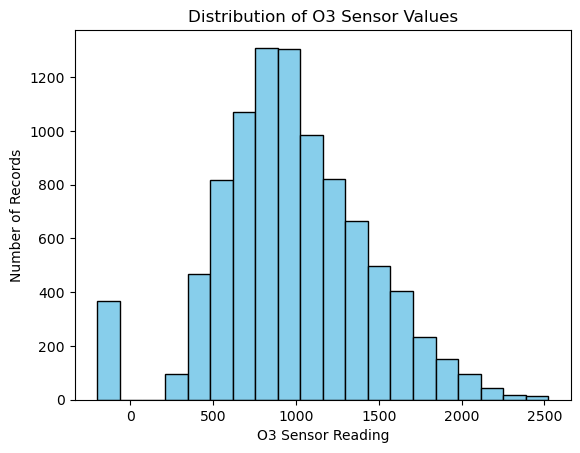

In [19]:
# Histogram of O3 sensor values
plt.hist(df["PT08.S5(O3)"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of O3 Sensor Values")
plt.xlabel("O3 Sensor Reading")
plt.ylabel("Number of Records")
plt.show()

In [20]:
# Function to classify AQI
def classify_aqi(o3_value):
    if o3_value <= 1000:
        return "Good"
    elif o3_value <= 2000:
        return "Moderate"
    else:
        return "Unhealthy"

# Apply function
df["AQI_Category"] = df["PT08.S5(O3)"].apply(classify_aqi)

# Check first few rows
df[["PT08.S5(O3)", "AQI_Category"]].head()

,PT08.S5(O3),AQI_Category
0,1268.0,Moderate
1,972.0,Good
2,1074.0,Moderate
3,1203.0,Moderate
4,1110.0,Moderate


In [21]:
# Features (inputs) and target
X = df[["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH"]]
y = df["AQI_Category"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [22]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

        Good       0.87      0.88      0.87      1051
    Moderate       0.82      0.81      0.82       789
   Unhealthy       0.78      0.56      0.65        32

    accuracy                           0.85      1872
   macro avg       0.82      0.75      0.78      1872
weighted avg       0.85      0.85      0.85      1872

Confusion Matrix:
 [[925 126   0]
 [143 641   5]
 [  0  14  18]]


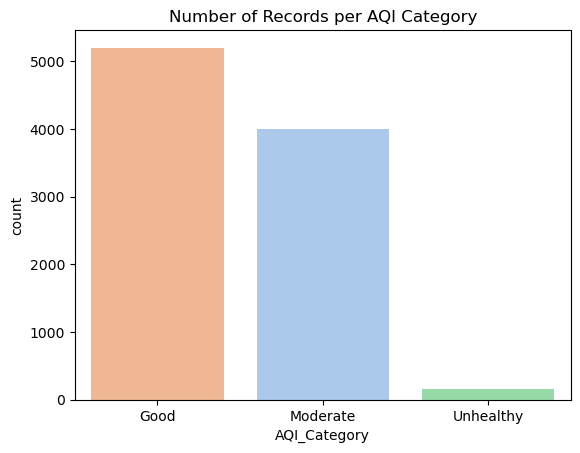

In [26]:
sns.countplot(x="AQI_Category", data=df, order=["Good", "Moderate", "Unhealthy"], hue="AQI_Category", dodge=False, palette="pastel", legend=False)
plt.title("Number of Records per AQI Category")
plt.show()

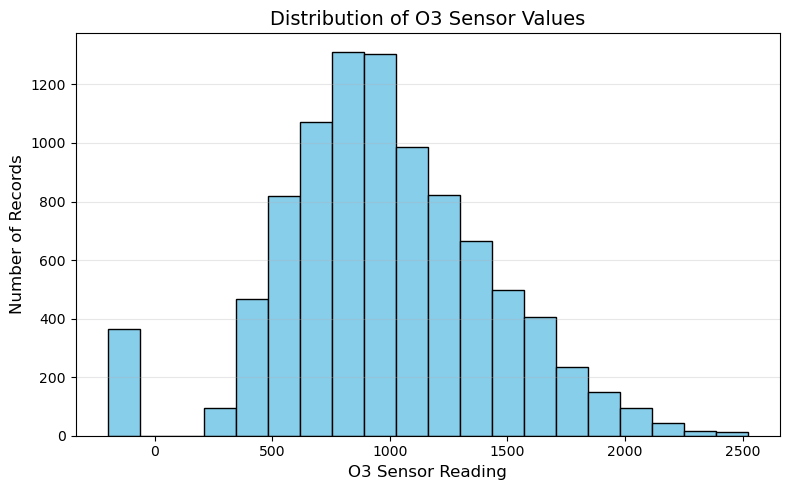

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["PT08.S5(O3)"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of O3 Sensor Values", fontsize=14)
plt.xlabel("O3 Sensor Reading", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

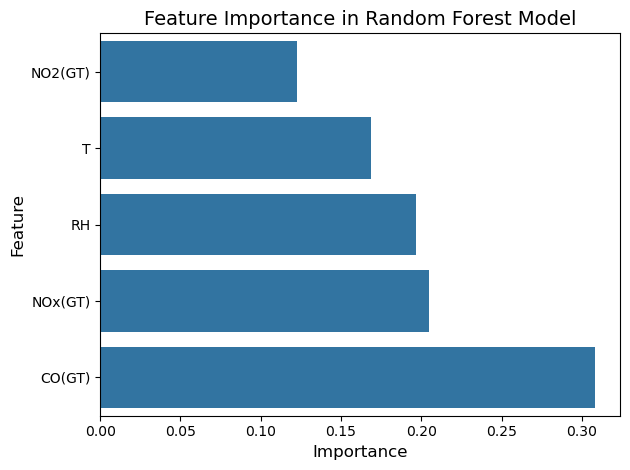

In [34]:
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance in Random Forest Model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

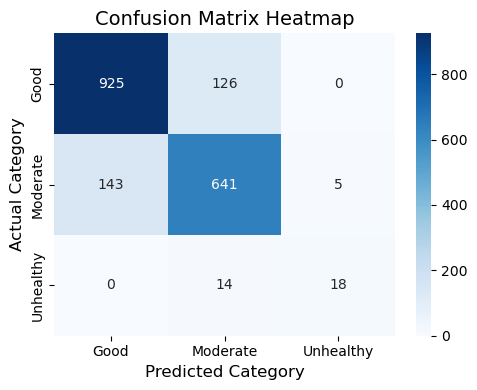

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=["Good","Moderate","Unhealthy"], 
    yticklabels=["Good","Moderate","Unhealthy"]
)
plt.xlabel("Predicted Category", fontsize=12)
plt.ylabel("Actual Category", fontsize=12)
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

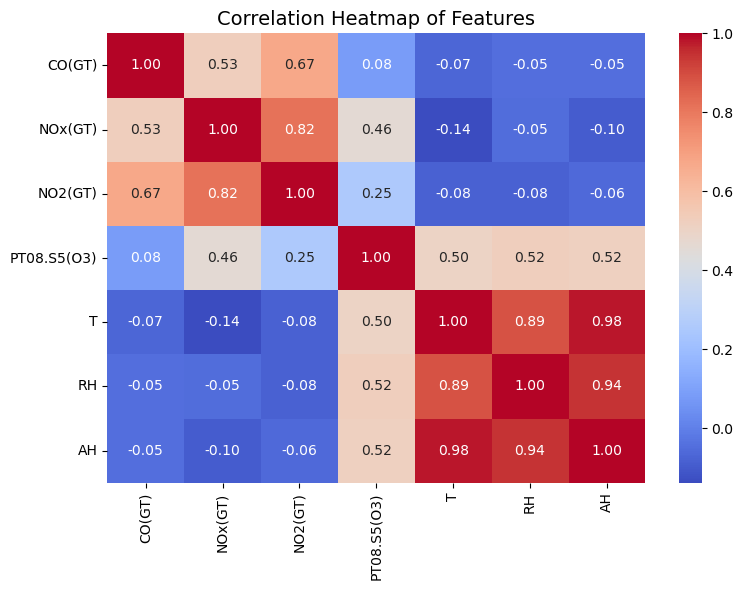

In [37]:
plt.figure(figsize=(8,6))
corr = df[["CO(GT)", "NOx(GT)", "NO2(GT)", "PT08.S5(O3)", "T", "RH", "AH"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.tight_layout()
plt.show()

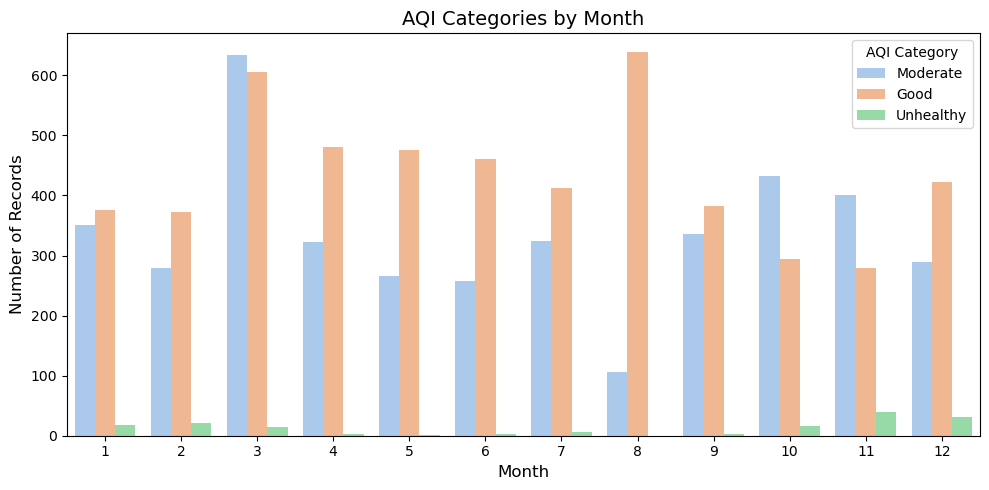

In [38]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract month
df['Month'] = df['Date'].dt.month

# Plot AQI count by month
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='AQI_Category', data=df, palette="pastel")
plt.title("AQI Categories by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.legend(title="AQI Category")
plt.tight_layout()
plt.show()

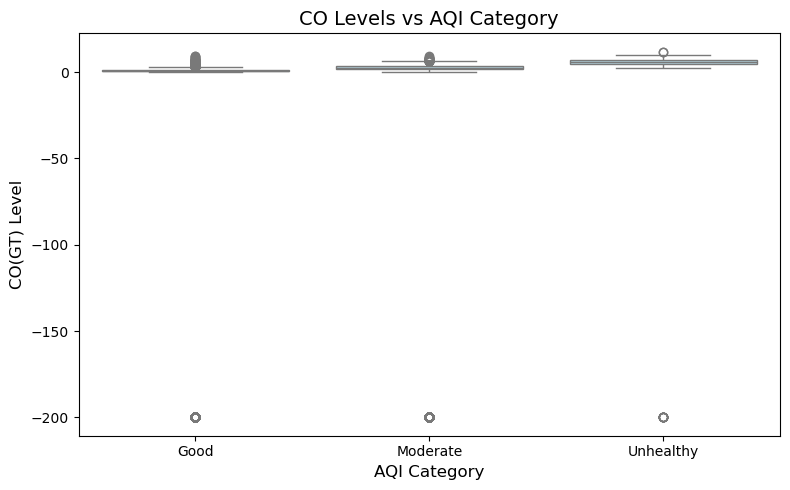

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="AQI_Category", 
    y="CO(GT)", 
    data=df, 
    order=["Good", "Moderate", "Unhealthy"], 
    color="lightblue"   # single color, no palette, no warnings
)
plt.title("CO Levels vs AQI Category", fontsize=14)
plt.xlabel("AQI Category", fontsize=12)
plt.ylabel("CO(GT) Level", fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
import os

# Create folder if not exists
os.makedirs("plots", exist_ok=True)

# Save each figure example
plt.figure(figsize=(8,5))
plt.hist(df["PT08.S5(O3)"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of O3 Sensor Values")
plt.xlabel("O3 Sensor Reading")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.savefig("plots/O3_distribution.png")
plt.close()  # close to avoid overlapping with next plots

# Repeat plt.savefig(...) for each of the other 4 plots